# Hausdorff distance
Computing hausdorff distance between clusters of ISH components and Neuroanatomy
* Using skimage
* Takes 2 ndarrays with Boolean values to show voxels in the region

In [22]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.metrics import hausdorff_distance
from scipy.spatial.distance import directed_hausdorff
%run nifti_tools.ipynb
%matplotlib inline

In [23]:
# Loading the annotations
ant_path = '/data/bioprotean/ABA/PCA/clusters/allen_annot200.nii'
ant_arr = nifti_to_array(ant_path)

In [24]:
# Loading a sample cluster
cluster_path = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed20.nii'
cluster_arr = nifti_to_array(cluster_path)

**Hausdorff distance between cluster i and anatomical region j**

In [30]:
# Setting TRUE for all voxels in the brain region
region_id = 816
ant_region = np.where(ant_arr == region_id, True, False)

In [31]:
# Setting TRUE for all voxels in the cluster
cluster_id = 6
cluster_section = np.where(cluster_arr == cluster_id, True, False)

In [32]:
# Computing the Hausdorff distance
h = hausdorff_distance(ant_region, cluster_section)
h

33.18132004607411

In [2]:
# Annotations is fixed, inputting it one time
ant_path = '/data/bioprotean/ABA/PCA/clusters/allen_annot200.nii'
ant_vec = nifti_to_vector(ant_path)

# Standardizing the vector using the function in nifti_tools.ipynb
ant_std = std_vector(ant_vec)

# Reshaping it to 2D
ant_arr = ant_std.reshape(67,-1)

In [19]:
# Inputting the Clusters
cluster_path = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed20.nii'
cluster_vec = nifti_to_vector(cluster_path)

# Standardizing the vector using the function in nifti_tools.ipynb
cluster_std = std_vector(cluster_vec)

# Reshaping it to 2D
cluster_arr = cluster_std.reshape(67,-1)

# Computing the Hausdorff distance
print(directed_hausdorff(ant_arr, cluster_arr)[0])
print(vectors_hausdorff(ant_vec, cluster_vec))

9.07189493243811
0.0241


In [ ]:
vec1 = nifti_to_vector(ant_path)
vec2 = nifti_to_vector(cluster_path)

arr1 = nifti_to_array(ant_path)
arr2 = nifti_to_array(cluster_path)
# Standardizing the vectors the function in nifti_tools.ipynb
vec1_std = std_vector(vec1)
vec2_std = std_vector(vec2)

# Reshaping the vectors to 2D
first_dim = vec1.shape[0]
vec1_arr = vec1_std.reshape(first_dim,-1)
vec2_arr = vec2_std.reshape(first_dim,-1)
    
# Computing the distance
haus_d = directed_hausdorff(arr1, arr2)[0]
print(haus_d)

In [14]:
vec1_arr.shape

(159326, 1)

**Computing the Hasudorff clusters for clusters from 1 to 200**

In [20]:
# List to save distances
haus_list = []

for i in range (1,201):
    # Inputting the Clusters
    cluster_path = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed'+str(i)+'.nii'
    cluster_vec = nifti_to_vector(cluster_path)

#     # Standardizing the vector using the function in nifti_tools.ipynb
#     cluster_std = std_vector(cluster_vec)

#     # Reshaping it to 2D
#     cluster_arr = cluster_std.reshape(67,-1)
    
    # Computing the Hausdorff distance
#     distance = directed_hausdorff(ant_arr, cluster_arr)[0]
    distance = vectors_hausdorff(ant_vec, cluster_vec)
    haus_list.append(distance)

/packages/7x/anaconda3/5.3.0/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


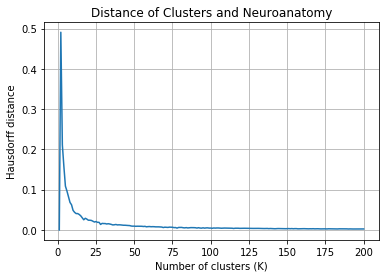

In [21]:
# Defining the list of Ks
Ks = range(1,201)

fig, ax = plt.subplots()
ax.plot(Ks, haus_list)

ax.set(xlabel='Number of clusters (K)', ylabel='Hausdorff distance',
       title='Distance of Clusters and Neuroanatomy')
ax.grid()

# fig.savefig("test.png")
plt.show()

**Plotting the distances for different Ks**

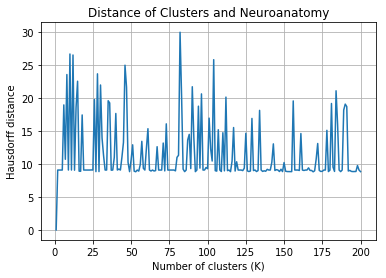

In [13]:
# Defining the list of Ks
Ks = range(1,201)

fig, ax = plt.subplots()
ax.plot(Ks, haus_list)

ax.set(xlabel='Number of clusters (K)', ylabel='Hausdorff distance',
       title='Distance of Clusters and Neuroanatomy')
ax.grid()

# fig.savefig("test.png")
plt.show()

**Measuring Hausdorff distance with shuffled labels**

In [53]:
# Inputting the Clusters
cluster_path = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed100.nii'
cluster_vec = nifti_to_vector(cluster_path)
shuffled_vec = shuffle_vector(cluster_vec) # Shuffling the labels

# Standardizing the vector using the function in nifti_tools.ipynb
cluster_std = std_vector(cluster_vec)
shuffled_std = std_vector(shuffled_vec)

# Reshaping it to 2D
cluster_arr = cluster_std.reshape(67,-1)
shuffled_arr = shuffled_std.reshape(67,-1)

# Computing the Hausdorff distance
old_distance = directed_hausdorff(ant_arr, cluster_arr)[0]
new_distance = directed_hausdorff(ant_arr, shuffled_arr)[0]

print('The new Hausdorff distance is {}, while it was {} before shuffling the labels'\
.format(new_distance, old_distance))

The new Hausdorff distance is 11.760161675243273, while it was 9.275640639905827 before shuffling the labels


**Measuring Hausdorff d with cluster labels being n times shuffled**

In [5]:
# Inputting the Clusters
cluster_path = '/data/bioprotean/ABA/PCA/clusters/nclusters_fixed10.nii'
cluster_vec = nifti_to_vector(cluster_path)

n_shuffles = 10
haus_d = vectors_hausdorff(ant_vec, cluster_vec)
shuffled_haus = shuffled_hausdorff(fixed_vec=ant_vec, changing_vec=cluster_vec, n=n_shuffles)

print('Shuffled Haus d measure for {} permutations is {}, while it was computed {} with no shuffling'\
.format(n_shuffles, shuffled_haus, haus_d))

Shuffled Haus d measure for 10 permutations is 0.048648304409451004, while it was computed 0.048648297786712646 with no shuffling


**Measuring Hausdorff distance with skimage library tool**